In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

snotel_file = '../data/BogusBasinSNOTEL_WY2010_1001-0630.csv'

Dd = 4.2
Tb = 3.1
SNOF = 1.55
Tscrit = 2.9

df = pd.read_csv(snotel_file, \
    names=['Y','M','D','depth','SWE','PRCP_cum','PRCP_day', \
    'T_obs','T_max','T_min','T_avg'],skiprows=1)

# Compute a serial date and append it to the data frame
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d')

df[0:10]

,Y,M,D,depth,SWE,PRCP_cum,PRCP_day,T_obs,T_max,T_min,T_avg,SerDates
0,2009,10,1,0.0,0.00,0.00,0.00,0.4,2.6,-1.6,0.3,2009-10-01
1,2009,10,2,0.0,0.00,0.00,0.00,-1.9,5.2,-4.7,0.5,2009-10-02
2,2009,10,3,0.0,0.00,0.00,0.00,-0.4,8.3,-2.8,2.4,2009-10-03
3,2009,10,4,127.0,17.78,17.78,17.78,1.1,5.7,-0.4,2.7,2009-10-04
4,2009,10,5,152.4,22.86,40.64,22.86,0.7,3.1,-0.4,1.4,2009-10-05
5,2009,10,6,203.2,20.32,45.72,5.08,-1.2,5.3,-1.3,1.1,2009-10-06
6,2009,10,7,177.8,20.32,45.72,0.00,0.1,7.0,-3.2,0.7,2009-10-07
7,2009,10,8,76.2,20.32,45.72,0.00,3.4,8.1,-1.9,2.8,2009-10-08
8,2009,10,9,50.8,12.70,45.72,0.00,1.5,6.5,-0.7,3.0,2009-10-09
9,2009,10,10,50.8,7.62,45.72,0.00,-1.2,5.0,-1.2,1.5,2009-10-10


In [56]:
P = df['PRCP_day'].values
T = df['T_avg'].values

Nt = T.size

Mf  = np.zeros(Nt)
Ps  = np.zeros(Nt)
SWE = np.zeros(Nt)

for t in np.arange(1,Nt,1):
    if (SWE[t-1] > 0.0) & (T[t] > Tb):
        Mf[t] = np.minimum((Dd*(T[t] - Tb)), SWE[t-1])

    if (P[t]>0.0):
        if (T[t] < Tscrit):
            Ps[t] = SNOF*P[t]
        else:
            Ps[t] = 0.0
    
    SWE[t] = SWE[t-1] + Ps[t] - Mf[t]


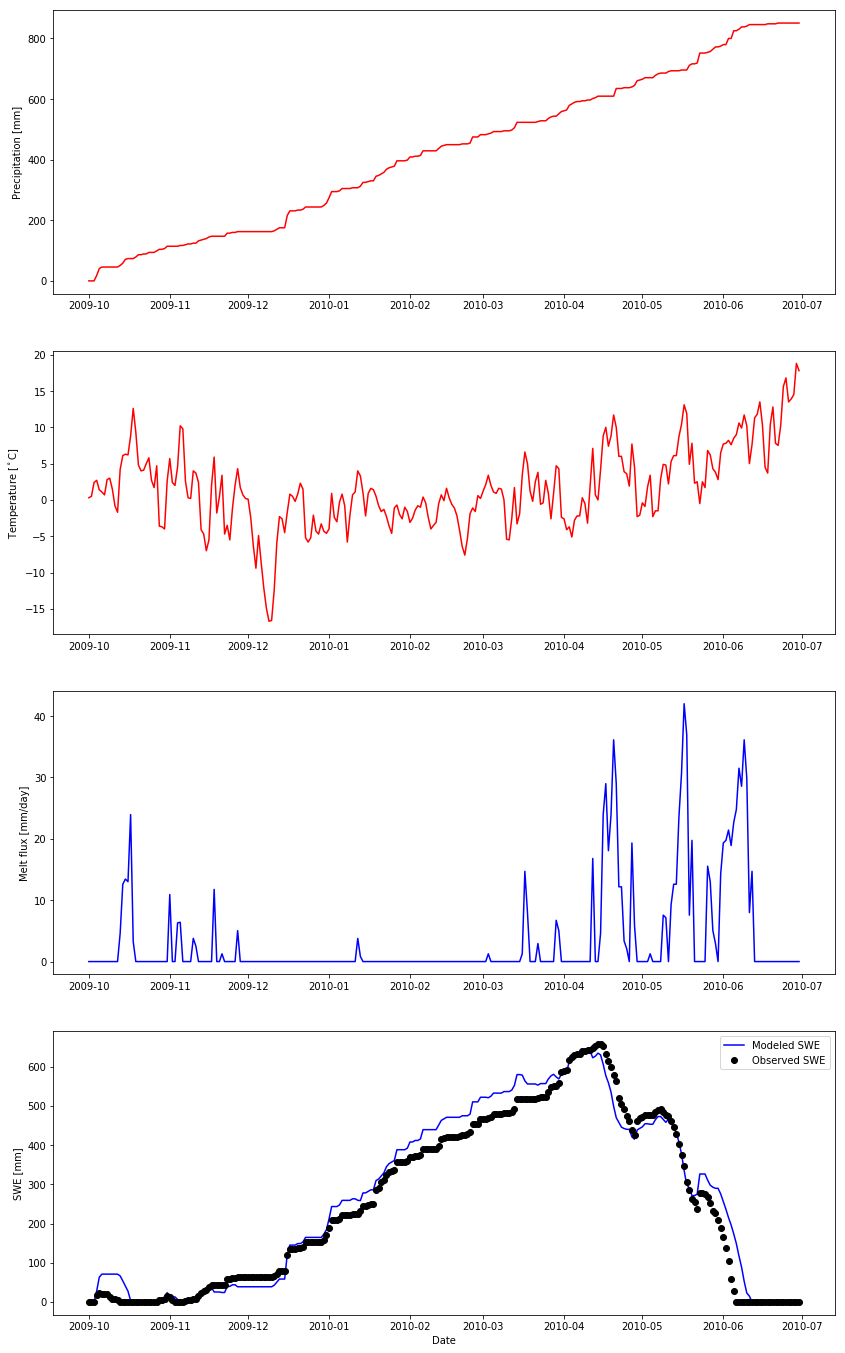

In [57]:
SerDates = df['SerDates'].values
SWEobs   = df['SWE'].values
Pcum     = df['PRCP_cum'].values

plt.figure(figsize=(14,24))
plt.subplot(411)
plt.plot(SerDates,Pcum,'r-')
plt.ylabel('Precipitation [mm]')
plt.subplot(412)
plt.plot(SerDates,T,'r-')
plt.ylabel('Temperature [${}^\circ$C]')
plt.subplot(413)
plt.plot(SerDates,Mf,'b-')
plt.ylabel('Melt flux [mm/day]')
plt.subplot(414)
plt.plot(SerDates,SWE,'b-')
plt.plot(SerDates,SWEobs,'ko')
plt.xlabel('Date')
plt.ylabel('SWE [mm]')
plt.legend(('Modeled SWE','Observed SWE'))
plt.show()
